# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class. 

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [150]:
%pip install memory_profiler torch torchsummary torchvision

Note: you may need to restart the kernel to use updated packages.


In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [156]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)


# Your code for tensor
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)


#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [158]:
# Create dataloader
# Your code for TensorDataset and dataloader
batchSize = 45

dataset = TensorDataset(X_t, y_t)

xDataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

Text(0.5, 1.0, 'Jack McDonald + Binary Classification')

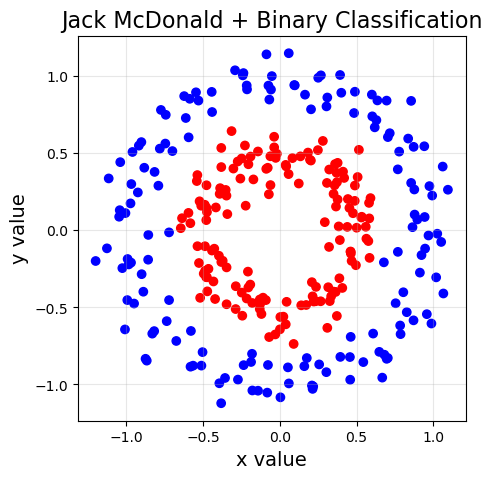

In [160]:

# Plot each class
# Your code plot with scatter

# Add Label and title

# Your code set graph axises
xt = X.T

plt.figure(figsize=(5, 5))
plt.scatter(xt[0], xt[1], c=["blue" if value == 0 else "red" for value in y_t])
plt.xlabel("x value", fontsize=14)
plt.ylabel("y value", fontsize=14)
plt.grid(alpha=0.3)
plt.title("Jack McDonald + Binary Classification", fontsize=16)


We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network 

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [163]:

class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            # Your code 
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop: 
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [165]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    # You may review the ipynb file from Week 6
    train_loss = []
    
    # Your code
    for epoch in range(epochs):
        losses = 0

        model.train()
        for X, y in dataloader:
            optimizer.zero_grad() # you code        # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten() # you code       # Forward pass to get output
            loss = criterion(y_hat, y) # you code        # Calculate loss
            loss.backward() # you code         # Getting gradients w.r.t. parameters
            optimizer.step() # you code            # Update parameters
            losses += loss.item() # you code       # Add loss for this batch to running total
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")
        train_loss.append(losses / len(dataloader))
    return train_loss

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

Let's train the model:

In [168]:
# Your code
# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
model = binaryClassifier(2, 6, 1)

LEARNING_RATE = 0.1
criterion = nn.BCELoss() #your code  # loss function - binary cross entropy loss
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE) #your code  # optimization algorithm - Adam

# trainer(model, criterion, optimizer, xDataloader)

#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [170]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

In [171]:
# build your trainer funtion with model, criterion, optimizer, dataloader, epochs=30, verbose=True
# Your code

train_loss = trainer(model, criterion, optimizer, xDataloader, epochs=30)

epoch: 1, loss: 0.6787
epoch: 2, loss: 0.6070
epoch: 3, loss: 0.5007
epoch: 4, loss: 0.3680
epoch: 5, loss: 0.2551
epoch: 6, loss: 0.1834
epoch: 7, loss: 0.1377
epoch: 8, loss: 0.1236
epoch: 9, loss: 0.1056
epoch: 10, loss: 0.0835
epoch: 11, loss: 0.0603
epoch: 12, loss: 0.0586
epoch: 13, loss: 0.0525
epoch: 14, loss: 0.0484
epoch: 15, loss: 0.0509
epoch: 16, loss: 0.0414
epoch: 17, loss: 0.0433
epoch: 18, loss: 0.0450
epoch: 19, loss: 0.0488
epoch: 20, loss: 0.0500
epoch: 21, loss: 0.0457
epoch: 22, loss: 0.0363
epoch: 23, loss: 0.0391
epoch: 24, loss: 0.0331
epoch: 25, loss: 0.0310
epoch: 26, loss: 0.0328
epoch: 27, loss: 0.0309
epoch: 28, loss: 0.0318
epoch: 29, loss: 0.0269
epoch: 30, loss: 0.0286


#### Visualize your results 

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

Text(0.5, 1.0, 'Jack McDonald loss curve')

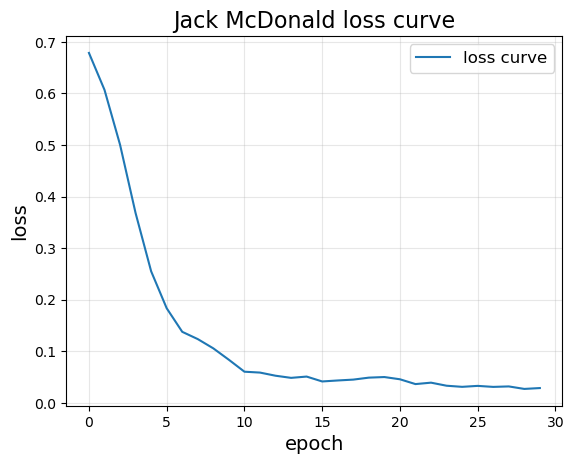

In [174]:
# Your code
plt.plot(train_loss)
plt.xlabel("epoch", fontsize=14)
plt.ylabel("loss", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(["loss curve"], fontsize=12)
plt.title("Jack McDonald loss curve", fontsize=16)


### Part 2: Actual and predicted data 

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

In [176]:
# Your code

To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [178]:
probability = model(X_t)
# print(probability)

In [179]:
classes = np.where(probability > 0.5, 1, 0)
# print(classes)

Text(0.5, 1.0, 'Jack McDonald + Actual Data')

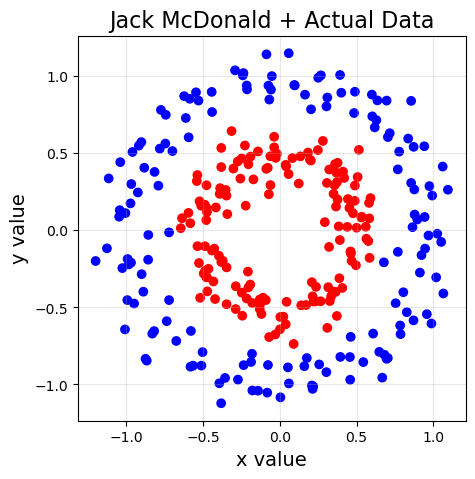

In [180]:
plt.figure(figsize=(5, 5))
plt.scatter(xt[0], xt[1], c=["blue" if value == 0 else "red" for value in y_t])
plt.xlabel("x value", fontsize=14)
plt.ylabel("y value", fontsize=14)
plt.grid(alpha=0.3)
plt.title("Jack McDonald + Actual Data", fontsize=16)

Text(0.5, 1.0, 'Jack McDonald + Predicted Data')

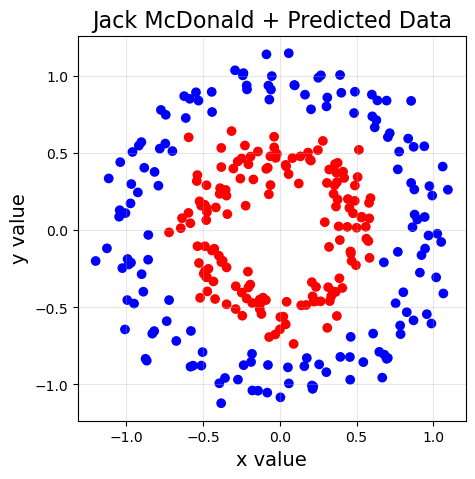

In [181]:
plt.figure(figsize=(5, 5))
plt.scatter(xt[0], xt[1], c=["blue" if value[0] == 0 else "red" for value in classes])
plt.xlabel("x value", fontsize=14)
plt.ylabel("y value", fontsize=14)
plt.grid(alpha=0.3)
plt.title("Jack McDonald + Predicted Data", fontsize=16)

### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. 

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. 

Let's try a 4-class classification problem using the following network:


In [184]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.long)

# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)

In [185]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

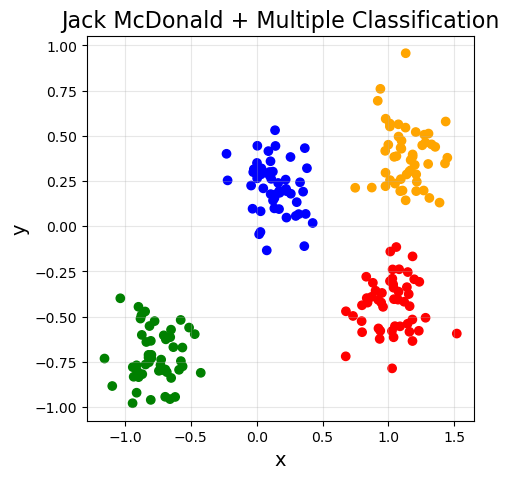

In [187]:
# Plot each class
# Your code plot with scatter

# Add Label and title

# Your code

xt = X.T

plt.figure(figsize=(5, 5))
plt.scatter(xt[0], xt[1], c=[("red", "green", "blue", "orange")[value] for value in y_t])

plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Jack McDonald + Multiple Classification", fontsize=16)
plt.grid(alpha=0.3)
plt.show()


Let's train this model:

In [189]:
# model with 2 input layers, 6 hidden layers, and 4 output layers via multiClassifier class
# Your code 
model_2 = multiClassifier(2, 6, 4)

# Your code 
criterion = torch.nn.CrossEntropyLoss() # loss function with CrossEntropyLoss
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.2) # optimization algorithm - Adam lr=0.2

train_loss = []

for epoch in range(10):
    losses = 0

    model_2.train()
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad() #your code       # Clear gradients w.r.t. parameters
        y_hat = model_2(X_batch) #your code           # Forward pass to get output
        loss = criterion(y_hat, y_batch) #your code  # Calculate loss
        loss.backward() #your code             # Getting gradients w.r.t. parameters
        optimizer.step() #your code            # Update parameters
        losses += loss.item() #your code        # Add loss for this batch to running total
    print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")
    train_loss.append(losses / len(dataloader))

epoch: 1, loss: 0.8677
epoch: 2, loss: 0.2035
epoch: 3, loss: 0.0542
epoch: 4, loss: 0.0122
epoch: 5, loss: 0.0151
epoch: 6, loss: 0.0017
epoch: 7, loss: 0.0062
epoch: 8, loss: 0.0018
epoch: 9, loss: 0.0006
epoch: 10, loss: 0.0007


#### Visualize your results 

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

Text(0.5, 1.0, 'Jack McDonald loss curve')

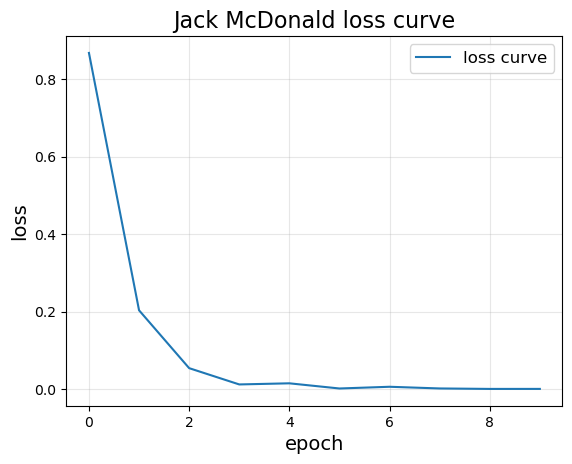

In [192]:
# Your code
plt.plot(train_loss)
plt.xlabel("epoch", fontsize=14)
plt.ylabel("loss", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(["loss curve"], fontsize=12)
plt.title("Jack McDonald loss curve", fontsize=16)


### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

In [194]:
probability = model_2(X_t)
classes = torch.argmax(probability, axis=1)

Text(0.5, 1.0, 'Jack McDonald + Actual Data')

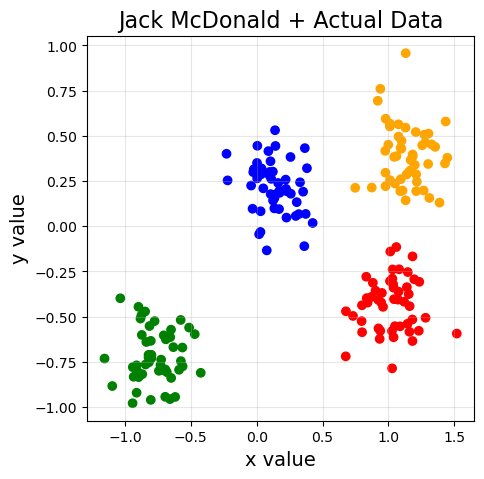

In [195]:
plt.figure(figsize=(5, 5))
plt.scatter(xt[0], xt[1], c=[("red", "green", "blue", "orange")[value] for value in y_t])
plt.xlabel("x value", fontsize=14)
plt.ylabel("y value", fontsize=14)
plt.grid(alpha=0.3)
plt.title("Jack McDonald + Actual Data", fontsize=16)

Text(0.5, 1.0, 'Jack McDonald + Predicted Data')

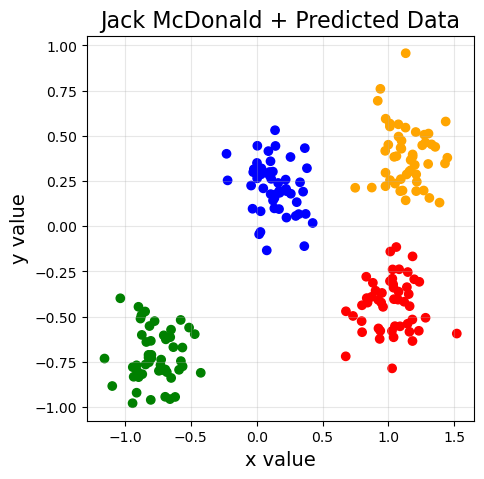

In [196]:
plt.figure(figsize=(5, 5))
plt.scatter(xt[0], xt[1], c=[("red", "green", "blue", "orange")[value] for value in classes])
plt.xlabel("x value", fontsize=14)
plt.ylabel("y value", fontsize=14)
plt.grid(alpha=0.3)
plt.title("Jack McDonald + Predicted Data", fontsize=16)